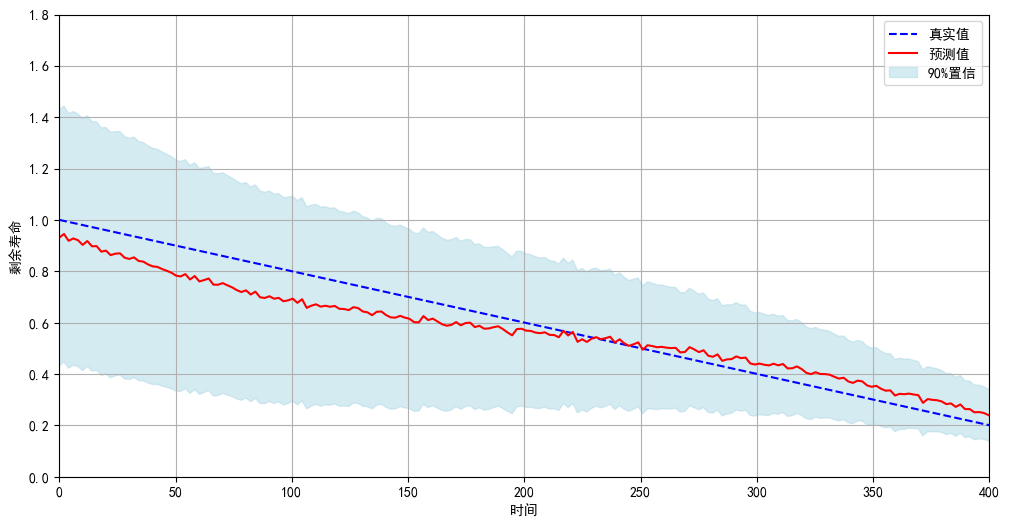

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 设置时间点从0到500
time_points = np.linspace(0, 500, 250)

# 真实剩余使用寿命（直线）
true_remaining_life = 1 - time_points / 500

# 估计值（稍微偏离直线的曲线）
estimated_life = true_remaining_life * (1 - 0.15 * np.sin(1.8 * np.pi * (time_points + 32) / 500) + 0.08 * np.sin(0.25 * np.pi * (time_points - 40) / 500))

noise = 0.008 * np.random.normal(size=len(time_points))
estimated_life = estimated_life + noise

# 5%的差距
five_percent_error = 0.5 * true_remaining_life

# 90%置信区间（围绕估计值上下波动）
confidence_lower = estimated_life - five_percent_error
confidence_upper = estimated_life + five_percent_error

# 绘制图形
plt.figure(figsize=(12, 6))
font_prop = FontProperties(family='SimHei', size=14)
# 绘制真实剩余使用寿命
plt.plot(time_points, true_remaining_life, label='真实值', color='blue', linestyle='--')

# 绘制估计值
plt.plot(time_points, estimated_life, label='预测值', color='red')

plt.xlim(0,400)
plt.ylim(0,1.8)

# 绘制90%置信区间
plt.fill_between(time_points, confidence_lower, confidence_upper, color='#ADD8E6', alpha=0.5, label='90%置信')

# 添加图例和标题
plt.legend()
plt.title('')

# 显示横纵坐标轴标签
plt.xlabel('时间')
plt.ylabel('剩余寿命')

# 展示图形
plt.grid(True)
plt.show()